# **Importing the libraries**

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# **Importing the dataset**

In [193]:
df=pd.read_csv("/content/drive/MyDrive/Projects and Datasets/cardekho_data.csv")

In [115]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Data Preprocessing**

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# To check the unique values of the following categorical columns
print("Fuel Type", df['Fuel_Type'].unique())
print("Seller", df['Seller_Type'].unique())
print("Transmission", df['Transmission'].unique())
print("Owner", df['Owner'].unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [ ]:
# To check the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [194]:
# Creating a new feature showing how old the car is w.r.t the current year i.e.,2023
df["current_year"] = 2023
df["Number_of_years"] = df['current_year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,Number_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [195]:
# Deleting the columns "Car_Name","Year" and "current_year" permanently
df.drop(["Car_Name","Year","current_year"], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [196]:
df = pd.get_dummies(df)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1


In [ ]:
df.shape

(301, 12)

In [197]:
df.drop(["Fuel_Type_CNG","Seller_Type_Dealer","Transmission_Automatic"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Number_of_years         301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [128]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


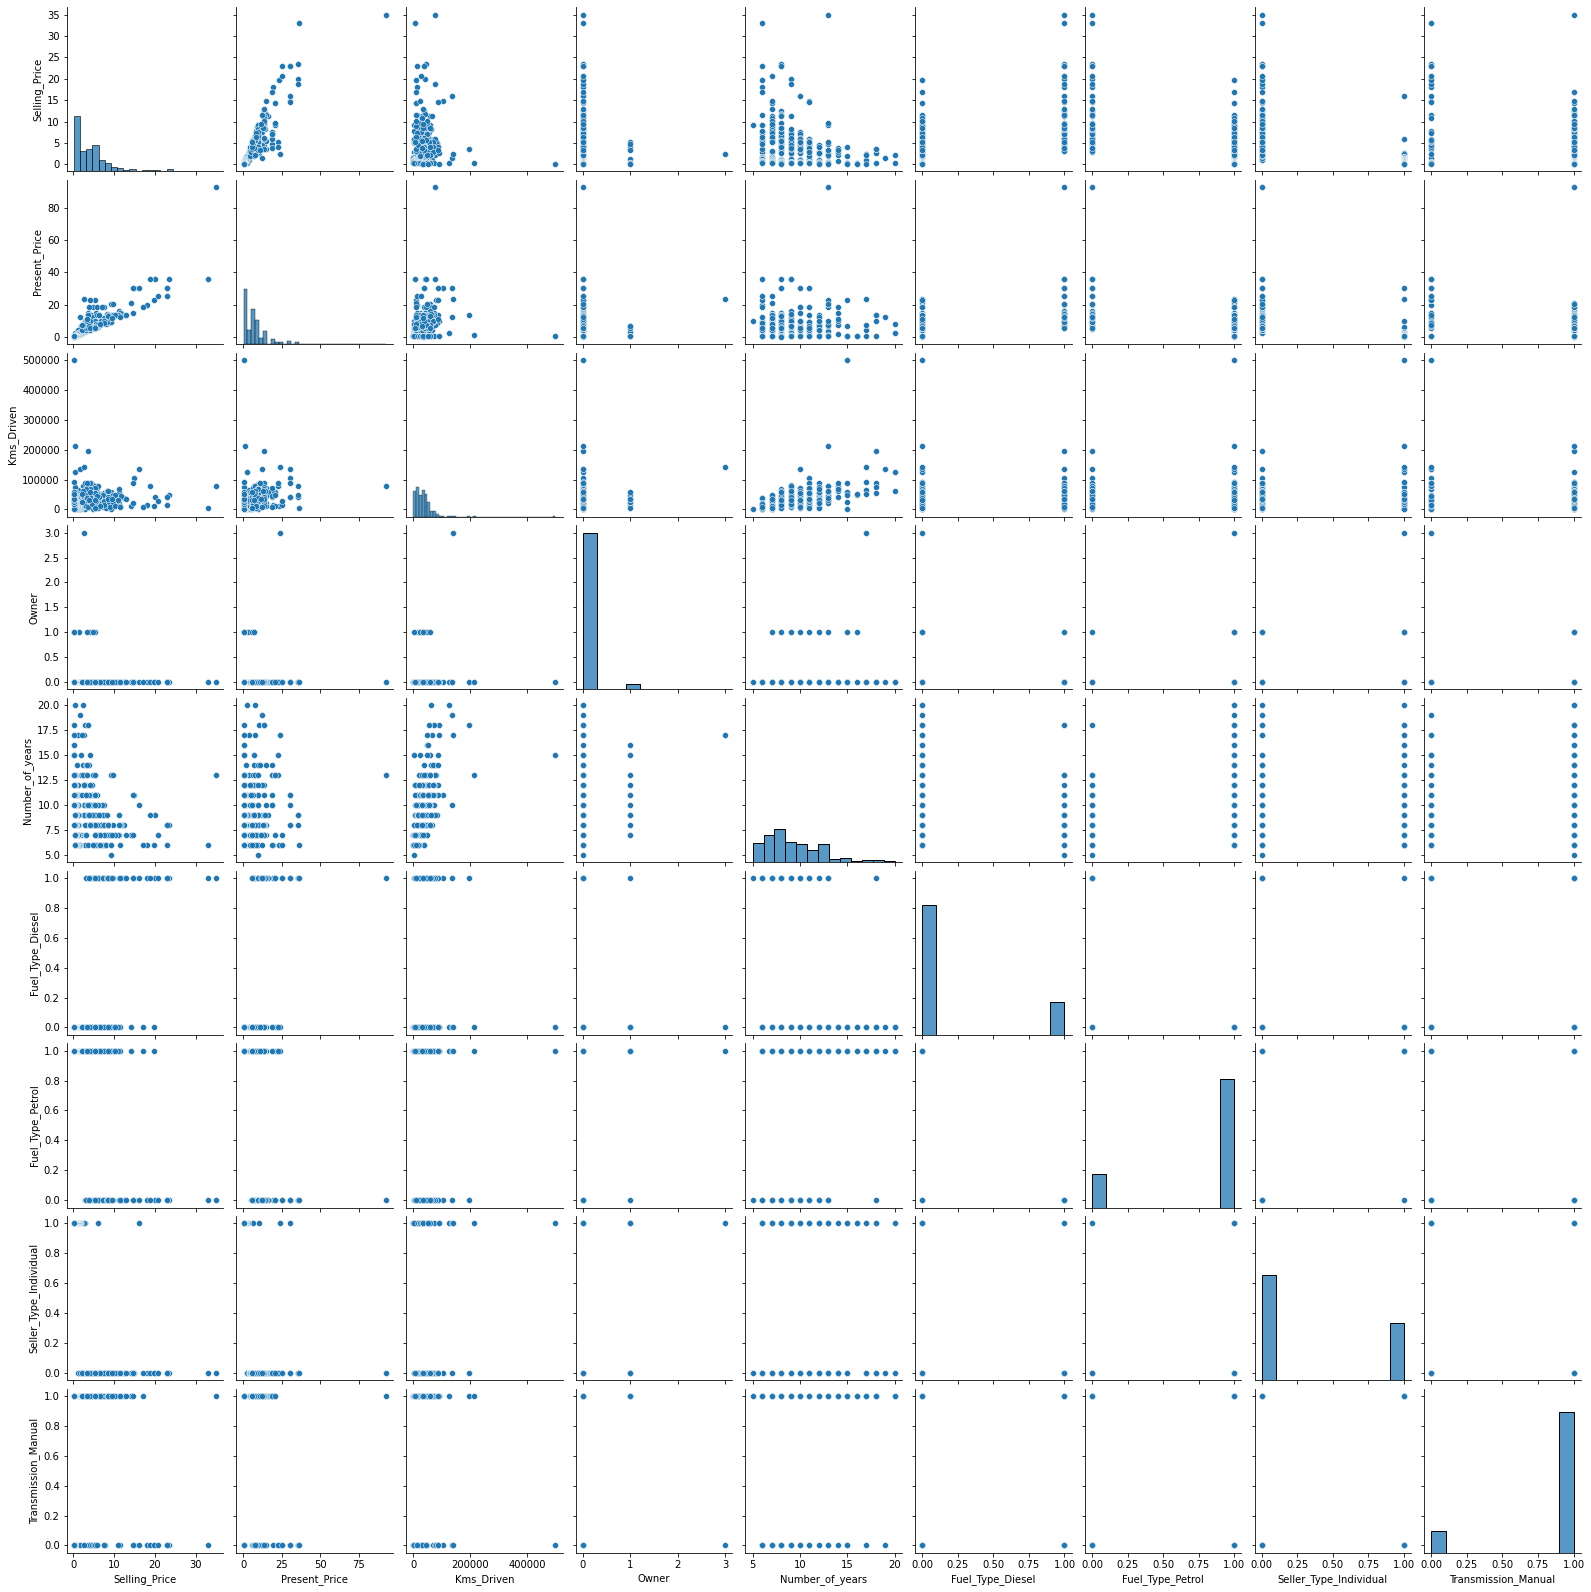

In [ ]:
# Plot a pairplot
sns.pairplot(df)

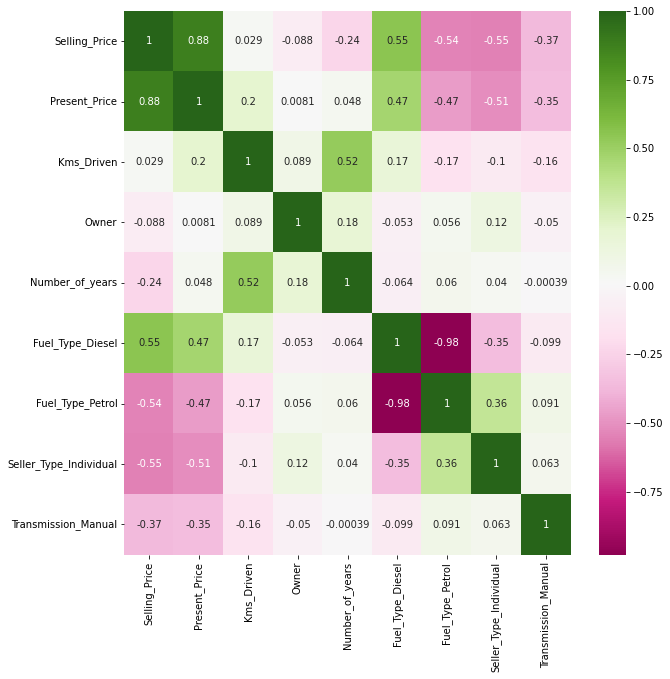

In [ ]:
# Plot a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="PiYG")

# **Selecting the features and targets**

In [198]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [165]:
x.head()

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [167]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# **Feature Selection (Feature Importance)**

In [199]:
model = ExtraTreesRegressor()

In [200]:
feature_imp=model.fit(x,y)
feature_imp.feature_importances_

array([0.39667901, 0.03915896, 0.00073497, 0.07899986, 0.22389728,
       0.01082618, 0.12595641, 0.12374734])

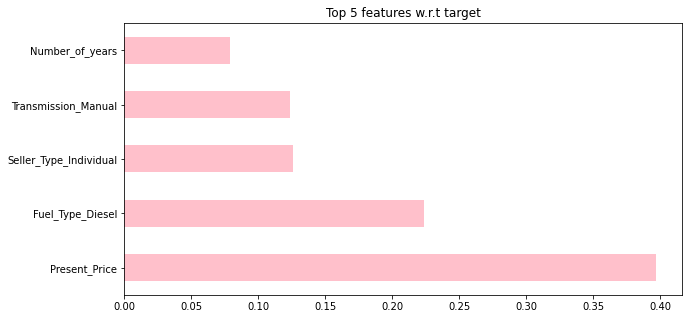

In [201]:
# Plot a graph to show top 5 features which have greater impact on target value
important_feature=pd.Series(feature_imp.feature_importances_,index=x.columns)
important_feature.nlargest(5).plot(kind="barh",figsize=(10,5),title="Top 5 features w.r.t target",color="pink")

# **LinearRegression**

In [157]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [158]:
# Model Selection
model=LinearRegression()

# Training the model
model.fit(x_train,y_train)

LinearRegression()

In [159]:
# Intercept Value
model.intercept_

5.893688031057592

In [97]:
# Coefficient Value
model.coef_

array([ 4.26479292e-01, -6.14426907e-06, -9.43575596e-01, -3.83128077e-01,
        2.49268277e+00,  5.83590556e-01, -1.14089738e+00, -1.43561056e+00])

In [160]:
# Testing the model
y_pred=model.predict(x_test)

In [161]:
target=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})
target.head()

,Actual Value,Predicted Value
223,8.25,7.517500
150,0.50,-0.381360
226,5.25,4.255947
296,9.50,9.007192
52,18.00,14.426934


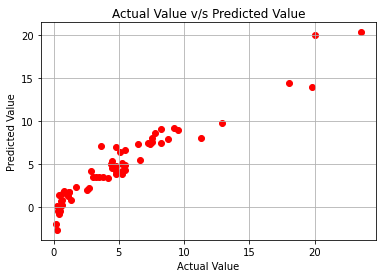

In [162]:
# To find relationship between y_test and y_pred
plt.scatter(y_test,y_pred,color="red")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value v/s Predicted Value")
plt.grid()

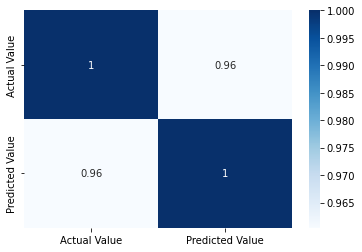

In [83]:
# To get heatmap
sns.heatmap(target.corr(),annot=True,cmap="Blues")

In [163]:
# Checking the performance
r2_score(y_test,y_pred)

0.9144342972228519

# **Decision Tree Regressor**

In [186]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [187]:
# Model Selection
model_2=DecisionTreeRegressor()

# Training the model
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [188]:
# Testing the model
y_pred=model_2.predict(x_test)

In [189]:
new_target=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})
new_target.head()

,Actual Value,Predicted Value
247,5.95,7.75
242,4.40,4.95
25,3.00,3.15
171,0.40,0.40
30,3.10,3.10


Text(0.5, 1.0, 'Actual Value v/s Predicted Value')

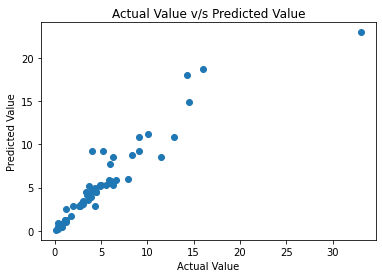

In [190]:
# To find relationship between y_test and y_pred
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value v/s Predicted Value")

In [191]:
# Checking the accuracy
r2_score(y_test,y_pred)

0.8763814189562835

# **Random Forest Regressor**

In [202]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [203]:
# Model Selection
regressor=RandomForestRegressor()

In [235]:
# Hper Parameter Tuning
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(i) for i in np.linspace(5, 30, num = 5)]
min_samples_split = [2, 1, 5, 12, 100]
min_samples_leaf = [1, 2, 8, 30]
criterion= ["squared_error", "absolute_error", "friedman_mse", "poisson"]     
min_weight_fraction_leaf = [int(x) for x in np.linspace(0, 0.5, num = 14)]     

In [236]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion,
               'min_weight_fraction_leaf': min_weight_fraction_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30], 'min_samples_split': [2, 1, 5, 12, 100], 'min_samples_leaf': [1, 2, 8, 30], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'min_weight_fraction_leaf': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [237]:
rf_regressor = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5,
                               verbose = 2, 
                               random_state = 42, 
                               n_jobs = 1)

In [238]:
# Training the model
rf_regressor.fit(x_train, y_train)    

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=poisson, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=300; total time=   0.3s
[CV] END criterion=poisson, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=300; total time=   0.3s
[CV] END criterion=poisson, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=300; total time=   0.3s
[CV] END criterion=poisson, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=300; total time=   0.5s
[CV] END criterion=poisson, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=300; total time=   0.3s
[CV] END criterion=poisson, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, mi

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", l

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 8, 30],
                                        'min_samples_split': [2, 1, 5, 12, 100],
                                        'min_weight_fraction_leaf': [0, 0, 0, 0,
                                                                     0, 0, 0, 0,
                                                                     0, 0, 0, 0,
                                                                     0, 0],
                              

In [239]:
rf_regressor.best_params_

{'n_estimators': 700,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 23,
 'criterion': 'friedman_mse'}

In [240]:
# Testing the model
y_pred = rf_regressor.predict(x_test)

In [242]:
final_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})
final_df.head()

,Actual Value,Predicted Value
223,8.25,6.909500
150,0.50,0.408686
226,5.25,4.525786
296,9.50,9.266671
52,18.00,21.205957


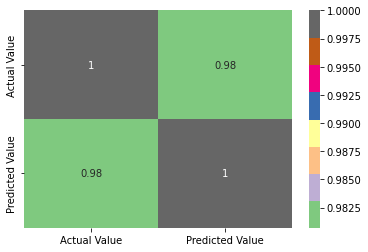

In [243]:
# To get heatmap
sns.heatmap(final_df.corr(),annot=True,cmap="Accent")

In [244]:
# Checking the accuracy
r2_score(y_test,y_pred)

0.9601949239214314

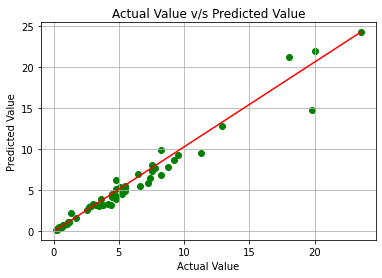

In [245]:
# Plot regression line
plt.scatter(y_test,y_pred,color="green")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value v/s Predicted Value")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color="red")